# Measure Trajectory Curvature

Update Matan 20240202

Written Matan 2019 05 11

This scrit measures the curvature of a trajectory over a window $\tau$.
Works well with trajectories that are rather persistent.
Was not tested with very noisy trajectories.

## Curvature measurement

The radius of curvature between steps 1, 2 and 3 is:

$$ R = \frac{\left|a-b\right|}{2 sin\theta}$$

where $a \equiv r_3-r_1$, and $b\equiv r_3-r_2$, and $\theta$ is the angle between $a$ and $b$.
 
Then we need to compute the radius of curvature for different time intervals, $r\left(t\right)$, $r\left(t+\tau\right)$, $r\left(t+2\tau\right)$: 

$$ \left<R\left(\tau\right)\right>_t = \left<\frac{a\left(t;\tau\right)-b\left(t;\tau\right)}{2 sin\theta\left(t;\tau\right)}\right>_t$$

Alternatively, this can also be parametrized on the curve-length.

###
$$ \left<\vec{V}\left(t\right)\cdot\vec{V}\left(t+\tau\right)\right>_t $$

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import time

%matplotlib inline
def l2n(x): return np.asarray(x);
import numpy as np
import numba
from matplotlib import pyplot as plt
from numba import njit
from scipy import interpolate

mpl.rc('text',usetex=True)
plt.style.use('dark_background')

params = {'legend.fontsize': 22,
          'figure.figsize': (8, 6),
         'axes.labelsize': 24,
         'axes.titlesize':24,
         'xtick.labelsize':22,
         'ytick.labelsize':22}
plt.rcParams.update(params)
plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)

In [2]:
#class calcPersistence:
#    

#@njit    
def _autoCorr(v,maxLag):
    vac = np.zeros(maxLag) #initialize the correlation function
    vMag = np.sum(np.sqrt(v*v),axis=0) #velocity magnitudes
    
    vac[0] = np.mean( np.sum( v*v ,axis=0)/(vMag*vMag));

    for tau in range(1,maxLag):            
        vac[tau] = np.mean( np.sum( v[:,tau:]*v[:,:-tau]/(vMag[tau:]*vMag[:-tau]) ,axis=0));
  
    return vac

def velocityTimeAutoCorrelation(t,r,maxLag=10):
    #Return the autocorelation of an instanteneous veolocity 
    #t - time, x - a position vector
    maxLag = min(maxLag,len(t)-1)

    tt = np.zeros(r.shape[0])+t[:,None]
    tt = tt.T
    v = np.diff(r)/np.diff(tt)

    vac = _autoCorr(v,maxLag)
    return vac

def calcInstantaneousCurvature(r):
    
    #calculates the local curvature at every point
    #r is a vector array of location
    
    #calculate difference between positions 3&1 and 2&1
    a = (np.roll(r,-2)-r)[:,:-2]
    b = (np.roll(r,-1)-r)[:,:-2]
    aNorm = np.linalg.norm(a)
    bNorm = np.linalg.norm(b)
    sinTheta = np.cross(a,b,axis=0)/(aNorm*bNorm)

    R = (a-b)/(2*sinTheta)

    return R


def calcWindowVectorCurvature(r,halfWindow=1):
    
    window=halfWindow*2
    
    #calculates the local curvature at every point
    #r is a vector array of location
    
    #calculate difference between positions 3&1 and 2&1
    a = (np.roll(r,-window)-r)[:,:-window]
    b = (np.roll(r,-halfWindow)-r)[:,:-window]
    aNorm = np.linalg.norm(a,axis=0)
    bNorm = np.linalg.norm(b,axis=0)
    sinTheta = np.cross(a,b,axis=0)/(aNorm*bNorm)

    R = (a-b)/(2*sinTheta)

    return R

def calcWindowScalarCurvature(r,halfWindow=1):
    
    window=halfWindow*2
    
    #calculates the local curvature at every point
    #r is a vector array of location
    
    #calculate difference between positions 3&1 and 2&1
    a = (np.roll(r,-window)-r)[:,:-window]
    b = (np.roll(r,-halfWindow)-r)[:,:-window]
    aNorm = np.linalg.norm(a,axis=0)
    bNorm = np.linalg.norm(b,axis=0)
    sinTheta = np.cross(a,b,axis=0)/(aNorm*bNorm)

    R = np.linalg.norm(a-b,axis=0)/(2*sinTheta)

    return R

def calcWindowTangent(r,window=1):
    #computer the local tangent.
    
    #calculates the local curvature at every point
    #r is a vector array of location
    
    #calculate difference between positions 3&1 and 2&1
    a = (np.roll(r,-window)-r)[:,:-window]
    
    
    return a

# Load Data 

In [3]:

linkedDataFileName = 'linkedTrajectories.csv'
tl = pd.read_csv(linkedDataFileName)
tl.head()
#np.roll(z,-2)-z

,frame,Unnamed: 0,objIndex,x,y,pnX,pnY,frame.1,particle,mass
0,0,2,2.0,343.489975,251.617794,NaN,NaN,0,0,798.0
1,0,3,3.0,336.946667,335.806061,NaN,NaN,0,1,825.0
2,1,6,6.0,342.515924,247.785987,NaN,NaN,1,0,785.0
3,1,7,7.0,336.368944,340.321739,NaN,NaN,1,1,805.0
4,2,10,10.0,341.290640,243.979064,NaN,NaN,2,0,812.0


# Calc Curvature 

In [4]:
halfWindow = 20
window=halfWindow*2
x1 = tl[tl.particle==0].x
y1 = tl[tl.particle==0].y

x2 = tl[tl.particle==1].x
y2 = tl[tl.particle==1].y

N1 = len(x1)
N2 = len(x2)

r1 = np.concatenate((x1,y1)).reshape(2,N1)
r2 = np.concatenate((x2,y2)).reshape(2,N2)

R1 = calcWindowScalarCurvature(r1,halfWindow)
R2 = calcWindowScalarCurvature(r2,halfWindow)




# Plot All Together 

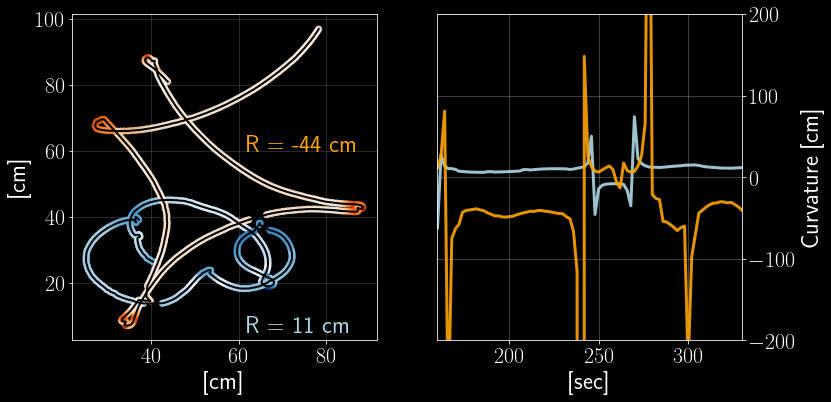

In [5]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

#account for scalebar
ppc = 6.2 #pixels per centimeter
X1 = r1[0,halfWindow*2:]/ppc
Y1 = r1[1,halfWindow*2:]/ppc
X2 = r2[0,halfWindow*2:]/ppc
Y2 = r2[1,halfWindow*2:]/ppc

t1 = np.arange(len(X1))
t2 = np.arange(len(X2))

t1New = t1[::2]
t2New = t2[::2]

R1new = interpolate.interp1d(t1,R1)(t1New)
R2new = interpolate.interp1d(t2,R2)(t2New)

ax[0].scatter(X1,Y1,c=np.roll(1/np.abs(R1),-halfWindow),cmap='Blues',s=ppc*6,alpha=1)
ax[0].scatter(X2,Y2,c=np.roll(1/np.abs(R2),-halfWindow),cmap='Oranges',s=ppc*6,alpha=0.8)

ax[0].plot(X1,Y1,c='k',linewidth=2)#0.5)
ax[0].plot(X2,Y2,c='k',linewidth=2)#0.5)
#ax[0].axis([0,100,0,100])

ax[1].plot(t1New,R1new/ppc,c='LightBlue',linewidth=3,alpha=0.9)
ax[1].plot(t2New,R2new/ppc,c='Orange',linewidth=3,alpha=0.9)
ax[1].axis([160,330,-200,200])
ax[1].grid(alpha=0.3)


ax[0].set_xlabel('[cm]')
ax[0].grid(alpha=0.2)
ax[0].set_ylabel('[cm]')

ax[1].set_xlabel('[sec]')
ax[1].set_ylabel('Curvature [cm]')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[0].text(62,5,'R = 11 cm',fontsize=24,color='LightBlue')
ax[0].text(62,60,'R = -44 cm',fontsize=24,color='Orange')
fig.savefig('curvature2Bots.png')

In [6]:
import trackpy as tp

/Users/matan/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/matan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


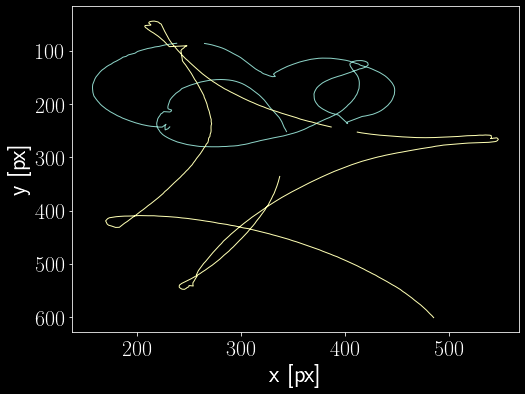

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [7]:
tp.plot_traj(tl)

In [8]:
print(np.median(R1new)/ppc)
print(np.median(R2new)/ppc)

10.931639980744166
-43.91266585350358
